# Quantum Angular Momentum

This file will show how to use the various objects and methods in the `sympy.physics.quantum.spin` module, with some examples. Much of the work in this module is based off Varschalovich "Quantum Theory of Angular Momentum".

## Imports

In [3]:
from IPython.display import display

In [4]:
from sympy import init_printing
init_printing(use_latex=True)

In [5]:
from sympy import factor, pi, S, Sum, symbols
from sympy.physics.quantum.spin import (
    Jminus, Jx, Jz, J2, J2Op, JzKet, JzKetCoupled, Rotation, WignerD, couple, uncouple
)
from sympy.physics.quantum import (
    Dagger, hbar, qapply, represent, TensorProduct
)

## Basic spin states and operators

We can define simple spin states and operators and manipulate them with standard quantum machinery.

Define a spin ket:

In [6]:
jz = JzKet(1,1)
jz

Find the vector representation of the state:

In [7]:
represent(jz)

Create and evaluate an innerproduct of a bra and a ket:

In [8]:
ip = Dagger(jz)*jz
ip

In [9]:
ip.doit()

Apply an angular momentum operator to the state:

In [10]:
Jz*jz

In [11]:
qapply(Jz*jz)

In [12]:
Jminus*jz

In [13]:
qapply(Jminus*jz)

We can also do this for symbolic angular momentum states:

In [14]:
j, m = symbols('j m')
jz = JzKet(j, m); jz

In [15]:
J2*jz

In [16]:
qapply(J2*jz)

Find the matrix representation of a angular momentum operator:

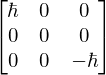

In [17]:
represent(Jz, j=1)

## Utilizing different bases

Angular momentum states and operators can be transformed between different spin bases. We can rewrite states as states in another basis:

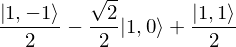

In [18]:
jz = JzKet(1, 1)
jz.rewrite("Jx")

Vector representation can also be done into different bases:

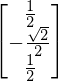

In [19]:
represent(jz, basis=Jx)

When applying operators in another spin basis, any conversion necessary to apply the state is done, then the states are given back in the original basis. So in the following example, the state returned by `qapply` are in the $J_z$ basis:

In [20]:
Jx*jz

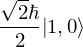

In [21]:
qapply(Jx*jz)

Rewriting states and applying operators between bases can also be done symbolically. In this case, the result is given in terms of Wigner-D matrix elements (see the next section for more information on the `Rotation` operator).

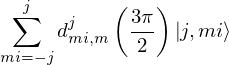

In [22]:
jz = JzKet(j, m)
jz.rewrite("Jx")

## Rotation operator

Arbitrary rotations of spin states, written in terms of Euler angles, can be modeled using the rotation operator. These methods are utilized to go between spin bases, as seen in the section above.

Define an arbitrary rotation operator. The given angles are Euler angles in the `z-y-z` convention.

In [23]:
a, b, g = symbols('alpha beta gamma')
Rotation(a, b, g)

Find the Wigner-D matrix elements of the rotation operator as given by $\langle j, m'|\mathcal{R}(\alpha, \beta, \gamma)|j,m\rangle$:

In [24]:
mp = symbols('mp')
r = Rotation.D(j, m, mp, a, b, g)
r

Numerical matrix elements can be evaluated using the `.doit()` method:

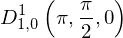

In [25]:
r = Rotation.D(1, 1, 0, pi, pi/2, 0)
r

In [26]:
r.doit()

The Wigner small-d matrix elements give rotations when $\alpha=\gamma=0$. These matrix elements can be found in the same manner as above:

In [27]:
r = Rotation.d(j, m, mp, b)
r

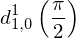

In [28]:
r = Rotation.d(1, 1, 0, pi/2)
r

In [ ]:
r.doit()

You can also directly create a Wigner-D matrix element:

In [29]:
WignerD(j, m, mp, a, b, g)

## Coupled and uncoupled states and operators

States and operators can also written in terms of coupled or uncoupled angular momentum spaces.

### Coupled states and operators

Define a simple coupled state of two $j=1$ spin states:

In [30]:
jzc = JzKetCoupled(1, 0, (1, 1)); jzc

Note that the Hilbert space of coupled states is the direct sum of the coupled spin spaces. This can be seen in the matrix representation of coupled states:

In [31]:
jzc.hilbert_space

In [32]:
represent(jzc)

We can also couple more than two spaces together. See the `JzKetCoupled` documentation for more complex coupling schemes involving more than 2 spaces.

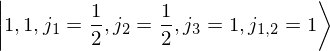

In [33]:
jzc = JzKetCoupled(1, 1, (S(1)/2, S(1)/2, 1))
jzc

The normal operators are assumed to be diagonal in the corresponding coupled basis:

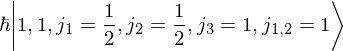

In [34]:
qapply(Jz*jzc)

### Uncoupled states and operators

Uncoupled states are defined as tensor products of states:

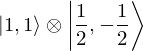

In [35]:
jzu = TensorProduct(JzKet(1, 1), JzKet(S(1)/2, -S(1)/2)); jzu

Vector representation of tensor product states gives the vector in the direct product space:

In [36]:
represent(jzu)

Uncoupled operators are also defined as tensor products:

In [38]:
jzopu = TensorProduct(Jz, 1)
jzopu

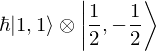

In [40]:
qapply(jzopu*jzu)

Coupled operators which are diagonalized by uncoupled states (e.g. $J_z$ and uncoupled $J_z$ eigenstates) can also be applied:

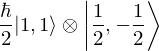

In [41]:
qapply(Jz*jzu)

Rewriting states works as before:

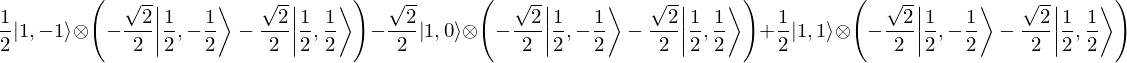

In [42]:
jzu.rewrite("Jx")

### Coulping and Uncoupling States

The `couple` method will couple an uncoupled state:

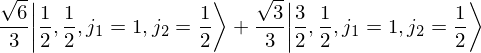

In [43]:
jzu = TensorProduct(JzKet(1, 1), JzKet(S(1)/2, -S(1)/2))
couple(jzu)

Similarly, the uncouple method will uncouple a coupled state:

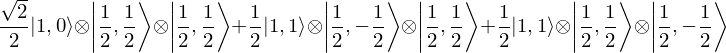

In [45]:
jzc = JzKetCoupled(2, 1, (1, S(1)/2, S(1)/2))
uncouple(jzc)

Uncoupling can also be done with the `.rewrite` method:

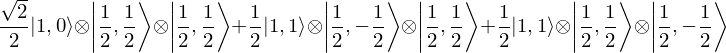

In [46]:
jzc.rewrite("Jz", coupled=False)

The `uncouple` method can also uncouple normal states if given a set of spin bases to consider:

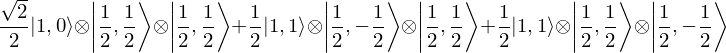

In [47]:
jz = JzKet(2, 1)
uncouple(jz, (1, S(1)/2, S(1)/2))